In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
import yfinance 
from datetime import datetime
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import plotly
import plotly.figure_factory as ff
import math
from scipy.cluster import hierarchy
from matplotlib import rcParams
import random
from scipy.spatial import distance
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

# 1. PCA

# 1.1 Give a qualitative description of Principal Component Analysis (PCA) and its applications in machine learning. Why might it be useful to consider PCA to transform a set of explanatory variables?

The answer for this question can be found in the report

# 1.2 Write down the mathematical equations for PCA explaining how one transforms the raw input data matrix X into a new set of variables. Give an interpretation of each matrix.

The answer for this question can be found in the report

# 1.3 Use at least one year of daily returns to calculate the correlation matrix for the 30 stocks that are constituents of the Dow Jones Index. Matlab’s “BlueChipStockMoments” can be used to calculate the correlation matrix. Use this correlation matrix for PCA and construct bar graphs to show the weight of each stock for the first and second principal components. Is the first or second principal component similar to the market (equal weight on each stock)? Discuss why?

In [2]:
string_tickers = "AAPL MMM AXP AMGN BA CAT CVX CSCO KO DIS DOW GS HD HON IBM INTC JNJ JPM MCD MRK MSFT NKE PG CRM TRV UNH VZ V WBA WMT"

finance_data= yfinance.download(string_tickers, start = datetime(2020,8,31), end = datetime(2021,11,29))
finance_data


[*********************100%***********************]  30 of 30 completed


Adj Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2020-08-31  128.028488  244.060425  100.001640  171.820007  138.551666   
2020-09-01  133.128189  241.690353  100.867897  172.100006  142.192871   
2020-09-02  130.369995  248.684982  102.767723  174.779999  145.327850   
2020-09-03  119.932449  238.848175  102.826782  168.770004  142.884125   
2020-09-04  120.011826  239.320267  104.017868  171.050003  144.266617   
...                ...         ...         ...         ...         ...   
2021-11-19  160.550003  206.080002  173.539993  214.130005  200.440002   
2021-11-22  161.020004  202.729996  170.899994  209.899994  202.380005   
2021-11-23  161.410004  204.529999  170.850006  209.130005  205.330002   
2021-11-24  161.940002  203.970001  171.610001  210.600006  207.070007   
2021-11-26  156.809998  201.089996  156.820007  199.210007  198.729996   

                                                                      ...  \
                   CRM       CSCO         CVX         DIS        DOW  ...   
Date                                                                  ...   
2020-08-31  272.649994  40.642376   78.593536  131.869995  42.635502  ...   
2020-09-01  281.250000  40.459473   77.797592  133.550003  44.667118  ...   
2020-09-02  276.690002  40.834904   77.900604  135.389999  46.509743  ...   
2020-09-03  265.010010  39.419834   77.048447  133.240005  45.725441  ...   
2020-09-04  254.699997  39.294685   76.720711  131.990005  45.923878  ...   
...                ...        ...         ...         ...        ...  ...   
2021-11-19  301.170013  53.250000  111.910004  154.000000  56.643158  ...   
2021-11-22  296.839996  54.599998  113.910004  154.160004  58.075539  ...   
2021-11-23  291.420013  55.299999  116.300003  151.029999  58.460796  ...   
2021-11-24  289.170013  55.540001  117.190002  151.339996  57.917484  ...   
2021-11-26  284.209991  54.669998  114.510002  148.110001  56.899998  ...   

              Volume                                                          \
                 MRK      MSFT      NKE       PG      TRV      UNH         V   
Date                                                                           
2020-08-31   7929273  28774200  3519800  5596800  2297900  4341600   9326900   
2020-09-01   6797433  25725500  4912400  5671800   969900  2487100   5642900   
2020-09-02  11571597  34080800  6775400  8384800  1391400  2846500   9863800   
2020-09-03  12983672  58400300  7264400  7277900  1299400  3872500  11310200   
2020-09-04   9359688  59664100  5157600  7437700  1460700  2901000  13243600   
...              ...       ...      ...      ...      ...      ...       ...   
2021-11-19  17581100  21963400  6145600  6274300  1619800  3536100  18032600   
2021-11-22  10880200  31031100  5906400  6625400  2021000  2598700  21185800   
2021-11-23  12130800  30427600  5302100  7912800  1441800  2857000  14742700   
2021-11-24   8537000  21661300  4637600  5665200  1139700  2248800  12026800   
2021-11-26  18022000  24217200  4751100  6299800  1262500  2480600  10987600   

                                          
                  VZ       WBA       WMT  
Date                                      
2020-08-31  14555500   7940100  15078800  
2020-09-01  13358400  10728300  35599400  
2020-09-02  21711900   7672400  17222000  
2020-09-03  23126800   8278000  16005000  
2020-09-04  22250100   6994400  11327400  
...              ...       ...       ...  
2021-11-19  21105200   7617800   9373100  
2021-11-22  22751600   4780800   9708800  
2021-11-23  21501600   7307300   9969300  
2021-11-24  15474500   7993900   6029800  
2021-11-26  17048100   5798700   7013200  

[314 rows x 180 columns]

In [3]:
#stocks annual returns
finance_data_adj_close=finance_data['Adj Close']
adj_close_returns = finance_data_adj_close.pct_change(fill_method='ffill').dropna()


In [4]:
#calculating the correlation matrix 
adj_close_corr_matrix= adj_close_returns.corr()
adj_close_corr_matrix

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,0.337229,0.085373,0.231456,0.054975,0.486926,0.377474,0.081327,0.104279,0.121686,...,0.107545,0.720787,0.243091,0.288371,0.187277,0.245331,0.345799,0.046195,0.055557,0.405163
AMGN,0.337229,1.000000,0.174219,0.197934,0.211608,0.148680,0.388172,0.223960,0.152749,0.210081,...,0.398203,0.369751,0.174575,0.370849,0.256665,0.433928,0.286411,0.357390,0.284913,0.273937
AXP,0.085373,0.174219,1.000000,0.608179,0.559179,0.122338,0.344176,0.650209,0.547835,0.571732,...,0.124915,0.083155,0.154398,0.003079,0.552340,0.298299,0.544241,0.312790,0.334551,0.082702
BA,0.231456,0.197934,0.608179,1.000000,0.485061,0.145353,0.358467,0.591412,0.431085,0.520929,...,0.083663,0.172078,0.155018,0.021876,0.437918,0.162265,0.381409,0.232806,0.401488,0.187500
CAT,0.054975,0.211608,0.559179,0.485061,1.000000,0.037867,0.335259,0.565147,0.411437,0.712049,...,0.192235,0.019686,0.121402,0.141509,0.516679,0.193570,0.324088,0.348578,0.390248,0.229117
CRM,0.486926,0.148680,0.122338,0.145353,0.037867,1.000000,0.262718,0.092669,0.124394,0.085522,...,0.113286,0.614618,0.173260,0.194599,0.002796,0.156604,0.353087,-0.019581,-0.083906,0.294412
CSCO,0.377474,0.388172,0.344176,0.358467,0.335259,0.262718,1.000000,0.378309,0.346619,0.378622,...,0.250332,0.422429,0.232576,0.420924,0.406725,0.312146,0.420549,0.363327,0.381545,0.326264
CVX,0.081327,0.223960,0.650209,0.591412,0.565147,0.092669,0.378309,1.000000,0.420364,0.649573,...,0.210334,0.076074,0.090105,0.047319,0.502222,0.238654,0.384625,0.372366,0.405970,0.143755
DIS,0.104279,0.152749,0.547835,0.431085,0.411437,0.124394,0.346619,0.420364,1.000000,0.388494,...,0.099013,0.158928,0.182393,0.090159,0.352154,0.201946,0.479601,0.281718,0.212937,0.110640
DOW,0.121686,0.210081,0.571732,0.520929,0.712049,0.085522,0.378622,0.649573,0.388494,1.000000,...,0.134856,0.047422,0.182971,0.112792,0.533953,0.150698,0.361182,0.376167,0.364525,0.230863


In [5]:
#calculating the PCA

pca=PCA(n_components=2)
finance_data_pca=pca.fit_transform(adj_close_corr_matrix)
finance_data_pca

array([[ 1.11581698,  0.47262905],
       [ 0.58018062, -0.41711317],
       [-0.97773501,  0.33484856],
       [-0.69072881,  0.4353716 ],
       [-0.89992195,  0.05956152],
       [ 1.17266124,  0.74024158],
       [ 0.03623158, -0.23529883],
       [-0.951931  ,  0.14306817],
       [-0.39410358,  0.35638212],
       [-0.92313843,  0.11497599],
       [-0.80258814,  0.33342328],
       [ 0.90662753, -0.07636182],
       [-0.80387474, -0.11875901],
       [-0.35921444, -0.2115421 ],
       [ 0.35128062,  0.47389148],
       [ 0.25940398, -0.61942342],
       [-1.12180441,  0.21170289],
       [-0.23398783, -0.35145811],
       [ 0.44085532, -0.03722224],
       [-0.30128127, -0.44417204],
       [ 0.61172581, -0.3246383 ],
       [ 1.2613871 ,  0.38735813],
       [ 0.71142645,  0.40006112],
       [ 0.91426063, -0.61619019],
       [-0.65578719, -0.15480951],
       [ 0.48475204, -0.27685162],
       [-0.05640996,  0.20974603],
       [-0.1463901 , -0.59936068],
       [-0.30345521,

In [6]:
finance_data_pca.shape

(30, 2)

In [7]:
#changing the pca values into dataframe
finance_data_pca_df = pd.DataFrame(data = finance_data_pca, columns = ['PC1', 'PC2'])
finance_data_pca_df['stocks']=adj_close_returns.columns
finance_data_pca_df

,PC1,PC2,stocks
0,1.115817,0.472629,AAPL
1,0.580181,-0.417113,AMGN
2,-0.977735,0.334849,AXP
3,-0.690729,0.435372,BA
4,-0.899922,0.059562,CAT
5,1.172661,0.740242,CRM
6,0.036232,-0.235299,CSCO
7,-0.951931,0.143068,CVX
8,-0.394104,0.356382,DIS
9,-0.923138,0.114976,DOW


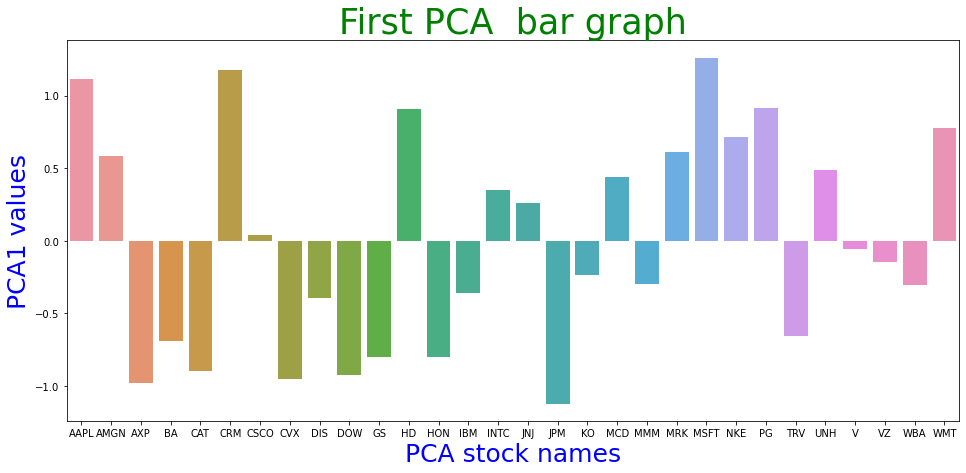

In [8]:
#plotting the first pca
plt.figure(figsize=(16,7))
sns.barplot(x=finance_data_pca_df.stocks,y=finance_data_pca_df['PC1'])
plt.ylabel('PCA1 values',size=25,color='blue')
plt.xlabel('PCA stock names',size=25,color='blue')
plt.title('First PCA  bar graph',size=35,color='green')
plt.show()

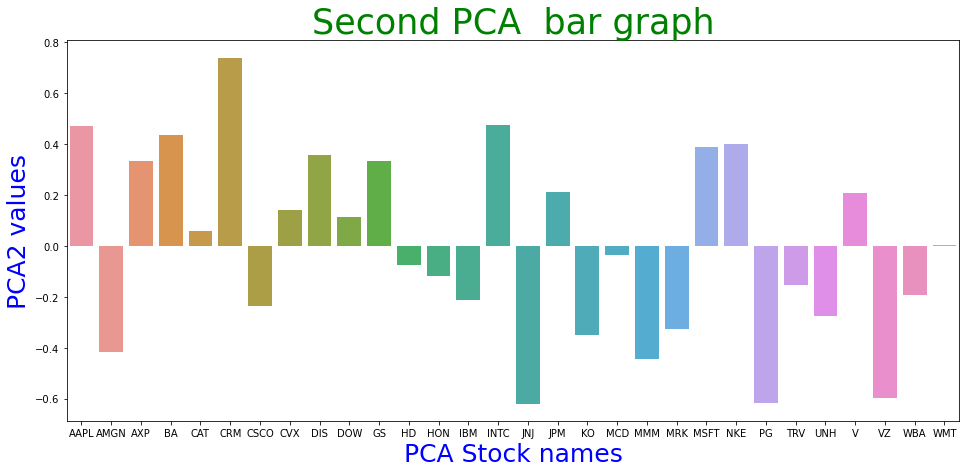

In [9]:
#plotting the second pca
plt.figure(figsize=(16,7))
sns.barplot(x=finance_data_pca_df.stocks,y=finance_data_pca_df['PC2'])
plt.ylabel('PCA2 values',size=25,color='blue')
plt.xlabel('PCA Stock names',size=25,color='blue')
plt.title('Second PCA  bar graph',size=35,color='green')
plt.show()

The theoritical answers can be found in the report


# 1.4 Calculate the amount of variance explained by each principal component and make a ‘Scree’ plot. How many principal components are required to explain 95% of the variance?

In [10]:
new_pca=PCA(n_components=30)
new_finance_data_pca=new_pca.fit_transform(adj_close_corr_matrix)

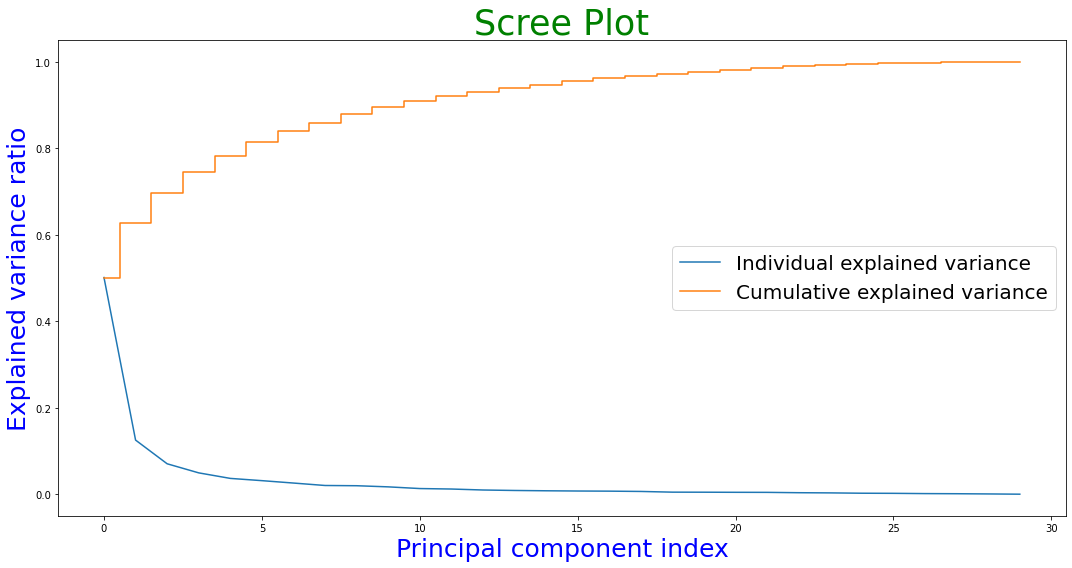

In [11]:
#plotting the scree plot
plt.figure(figsize=(15,8))
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = new_pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.plot(range(0,len(exp_var_pca)), exp_var_pca, label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio',size=25,color='blue')
plt.xlabel('Principal component index',size=25,color='blue')
plt.legend(loc='best',fontsize=20)
plt.title('Scree Plot',size=35,color='green')
plt.tight_layout()
plt.show()


In [12]:
cum_sum_eigenvalues

array([0.50130758, 0.62649655, 0.69685396, 0.74619156, 0.78273241,
       0.81405835, 0.83983794, 0.85997823, 0.87956163, 0.89652271,
       0.9095695 , 0.9215171 , 0.93121038, 0.93982215, 0.94770979,
       0.95505287, 0.9620806 , 0.96842908, 0.97313965, 0.97773012,
       0.9820947 , 0.98632159, 0.9897417 , 0.99274615, 0.99497334,
       0.99695703, 0.99832568, 0.99941298, 1.        , 1.        ])

In [13]:

principal_components=0
for value in cum_sum_eigenvalues:
    if value>=0.95:
        break
    principal_components+=1
print(f"The total number  principal components required to explain 95% of the variance are : {principal_components}")
        

The total number  principal components required to explain 95% of the variance are : 15


# 1.5 Investigate the scatter plot of the first two principal components and calculate the average of all 30 stocks. Based on Euclidean distances away from this average, identify the three most distant stocks. Can you explain why these stocks are unusual?

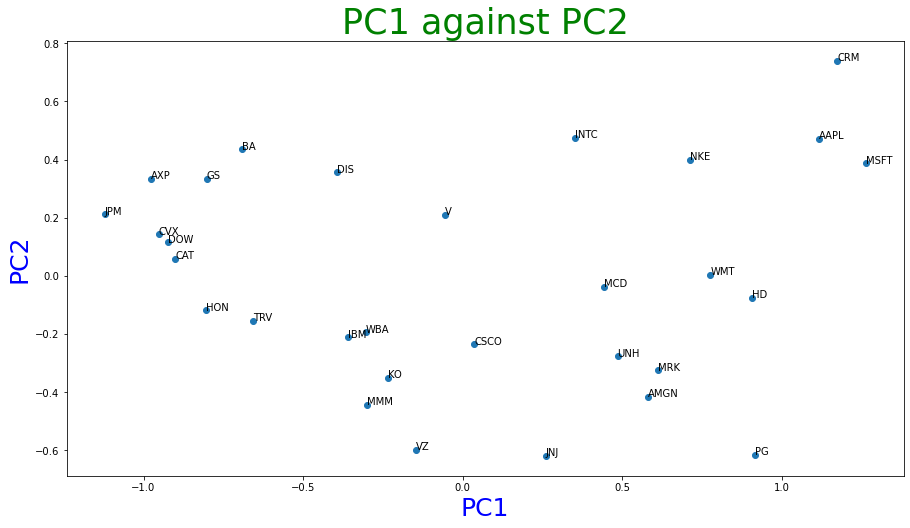

In [14]:
plt.figure(figsize=(15,8))
plt.scatter(finance_data_pca_df.PC1, finance_data_pca_df.PC2)
plt.xlabel('PC1',size=25,color='blue')
plt.ylabel('PC2',size=25,color='blue')
plt.title('PC1 against PC2',size=35,color='green')

first_pca=finance_data_pca_df.PC1
second_pca=finance_data_pca_df.PC2
stocks=finance_data_pca_df.stocks

for index,stock in enumerate(stocks):
    plt.annotate(stock,(first_pca[index],second_pca[index]))

plt.show()

In [15]:
#PCA1 mean

pca1_mean=finance_data_pca_df['PC1'].mean()

#PCA2 mean
pca2_mean=finance_data_pca_df['PC2'].mean()

print(f"\nPCA1 mean is: {pca1_mean}\n")
print(f"PCA2 mean is: {pca2_mean}")


PCA1 mean is: -5.551115123125783e-17

PCA2 mean is: 9.957312752106872e-17


In [16]:
#eclidean distances for PCA1

pca1=finance_data_pca_df['PC1']

pca1_eucledean_distance=[]

for pca1_value in pca1:
    pca1_eucledean_distance.append(distance.euclidean(pca1_value,pca1_mean))

pca1_eucledean_distance_df = pd.DataFrame(data = pca1_eucledean_distance, columns = ['PCA1_eucl_distance'])
pca1_eucledean_distance_df['stocks']=adj_close_returns.columns
sorted_pca1_eucledean_distance =pca1_eucledean_distance_df.sort_values(['PCA1_eucl_distance'],ascending=False)
sorted_pca1_eucledean_distance.head(3)

,PCA1_eucl_distance,stocks
21,1.261387,MSFT
5,1.172661,CRM
16,1.121804,JPM


In [17]:
#eclidean distances for PCA2
pca2=finance_data_pca_df['PC2']

pca2_eucledean_distance=[]

for pca2_value in pca2:
    pca2_eucledean_distance.append(distance.euclidean(pca2_value,pca2_mean))
    
    
pca2_eucledean_distance_df = pd.DataFrame(data = pca2_eucledean_distance, columns = ['PCA2_eucl_distance'])
pca2_eucledean_distance_df['stocks']=adj_close_returns.columns
sorted_pca2_eucledean_distance =pca2_eucledean_distance_df.sort_values(['PCA2_eucl_distance'],ascending=False)
sorted_pca2_eucledean_distance.head(3)

,PCA2_eucl_distance,stocks
5,0.740242,CRM
15,0.619423,JNJ
23,0.616190,PG


# 2. Dendrogram

# 2.1. Describe the components of a dendrogram, how it is constructed and how it is interpreted.

The clear explanation for this question can be found in the report


# 2.2. Given a collection of pairwise dissimilarity values, describe the steps involved in constructing a dendrogram.

The clear explanation for this question can be found in the report

# 2.3. Use the correlation matrix from question (1.3) above to provide pairwise distances between the 30 stocks. Give the formula for this rescaled distance and provide an interpretation of small and large distances.

In [18]:
pairwise_distance=(2*(1-adj_close_corr_matrix))**(1/2)
pairwise_distance

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.000000,1.151322,1.352499,1.239793,1.374791,1.012990,1.115819,1.355488,1.338448,1.325379,...,1.336005,0.747280,1.230373,1.193003,1.274930,1.228552,1.143854,1.381163,1.374367,1.090722
AMGN,1.151322,0.000000,1.285131,1.266543,1.255701,1.304853,1.106190,1.245825,1.301731,1.256916,...,1.097085,1.122719,1.284854,1.121741,1.219291,1.064022,1.194646,1.133675,1.195899,1.205042
AXP,1.352499,1.285131,0.000000,0.885236,0.938958,1.324886,1.145272,0.836410,0.950962,0.925493,...,1.322940,1.354138,1.300463,1.412035,0.946213,1.184653,0.954734,1.172357,1.153646,1.354473
BA,1.239793,1.266543,0.885236,0.000000,1.014829,1.307400,1.132725,0.903978,1.066691,0.978848,...,1.353763,1.286796,1.299986,1.398660,1.060266,1.294400,1.112287,1.238704,1.094086,1.274755
CAT,1.374791,1.255701,0.938958,1.014829,0.000000,1.387179,1.153031,0.932580,1.084954,0.758882,...,1.271035,1.400225,1.325593,1.310336,0.983179,1.269985,1.162680,1.141422,1.104311,1.241679
CRM,1.012990,1.304853,1.324886,1.307400,1.387179,0.000000,1.214316,1.347094,1.323333,1.352389,...,1.331701,0.877931,1.285877,1.269174,1.412235,1.298766,1.137465,1.427993,1.472349,1.187930
CSCO,1.115819,1.106190,1.145272,1.132725,1.153031,1.214316,0.000000,1.115070,1.143137,1.114790,...,1.224473,1.074775,1.238890,1.076175,1.089288,1.172906,1.076523,1.128426,1.112165,1.160806
CVX,1.355488,1.245825,0.836410,0.903978,0.932580,1.347094,1.115070,0.000000,1.076695,0.837170,...,1.256715,1.359357,1.348996,1.380349,0.997775,1.233974,1.109391,1.120387,1.089981,1.308621
DIS,1.338448,1.301731,0.950962,1.066691,1.084954,1.323333,1.143137,1.076695,0.000000,1.105898,...,1.342376,1.296975,1.278755,1.348956,1.138285,1.263372,1.020195,1.198567,1.254642,1.333687
DOW,1.325379,1.256916,0.925493,0.978848,0.758882,1.352389,1.114790,0.837170,1.105898,0.000000,...,1.315404,1.380274,1.278303,1.332072,0.965450,1.303305,1.130325,1.116990,1.127364,1.240272


# 2.4. Construct a horizontal dendrogram using the average linkage approach, carefully labelling the graphic with the names of the 30 stocks.

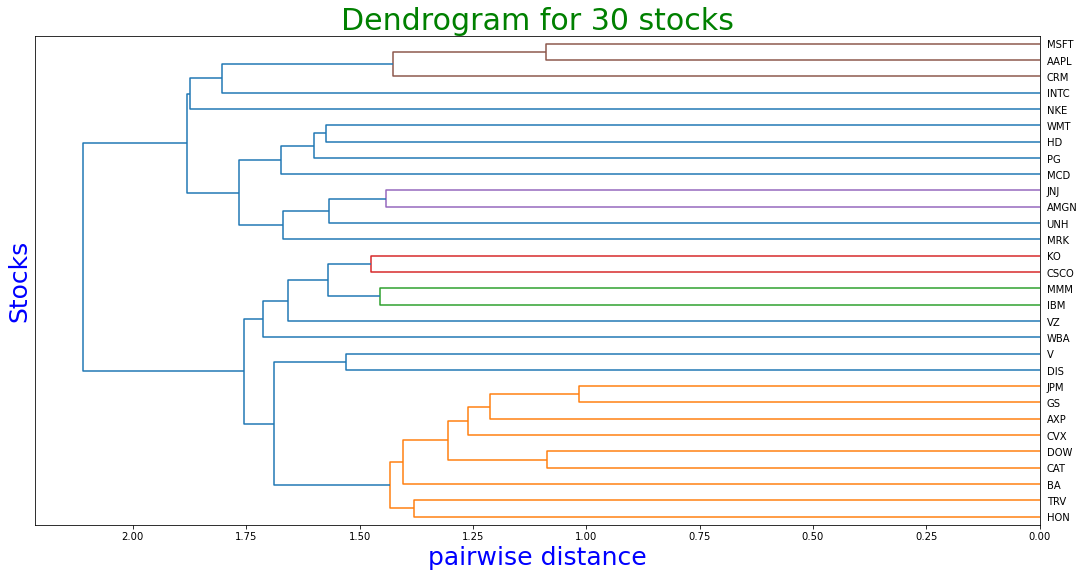

In [19]:
plt.figure(figsize=(18,9))
column_names=pairwise_distance.columns
Z = hierarchy.linkage(pairwise_distance, 'average')
hierarchy.dendrogram(Z,orientation='left',labels=column_names)
plt.xlabel("pairwise distance",color="blue",size=25)
plt.ylabel("Stocks",color="blue",size=25)
plt.title("Dendrogram for 30 stocks",color="green",size=30)
plt.show()



# 2.5. Use the dendrogram to provide a few clusters of stocks and list the stocks that are members of each cluster. Can you provide a description of each cluster and relate it to industrial sectors such as Financials, Energy etc?

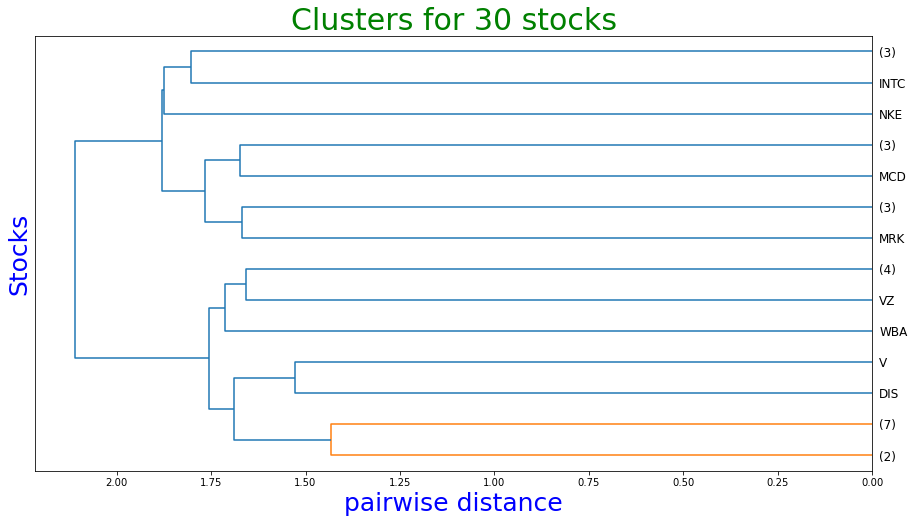

In [20]:
plt.figure(figsize=(15,8))
clusters= hierarchy.linkage(pairwise_distance, 'average')
hierarchy.dendrogram(clusters, truncate_mode = 'level', p=3,labels=column_names,orientation='left')
plt.xlabel("pairwise distance",color="blue",size=25)
plt.ylabel("Stocks",color="blue",size=25)
plt.title("Clusters for 30 stocks",color="green",size=30)
plt.show()


# 3. Ensembles for classification

# 3.1 Name three sources of uncertainty and explain how they impact on the modelling process when using machine learning approaches.

The clear explanation for this question can be found in the report


# 3.2 What is the concept behind model averaging and give some examples of how this technique can be implemented in practice when generating predictions?

The clear explanation for this question can be found in the report

# 3.3 What kind of ensemble methods can be used to reduce the effects of uncertainty and improve on individual models? How do they achieve this goal?

The clear explanation for this question can be found in the report

# 3.4 Construct a random forest (RF) model and apply this to the Titanic dataset. Explain how you selected the optimal number of trees and support your choice using a graph.

In [21]:
#laoding the dataset
titanic_address="titanic3.csv"
titanic_data=pd.read_csv(titanic_address)
titanic_data=titanic_data.filter(["pclass","survived","sex","age"])

#filtering explanatory variables and dependent variable in the dataset
X=titanic_data.filter(['pclass','sex','age'])
X['sex'] = X['sex'].replace(to_replace={'male':1,'female':0})
y=titanic_data.filter(['survived'])

#checking if explanatory variables contains null values and where we find it , we will replace it by the mean of that column
X.isnull().sum()
X['age']=X['age'].fillna(X['age'].mean())

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [22]:

rf_accuracy_score_list=[]
trees_list=[50,100,150,200,300,400,500,600,750,850,1000,1200]
for value in trees_list:
    regressor = RandomForestRegressor(n_estimators = value,random_state=20)
    regressor.fit(X_train,y_train)
    random_forest_scores=regressor.score(X,y)
    rf_accuracy_score_list.append(random_forest_scores)
                               

titanic_trees_df = pd.DataFrame(data = rf_accuracy_score_list, columns = ['Accuracy scores'])
titanic_trees_df['number of trees']=trees_list
titanic_trees_df

,Accuracy scores,number of trees
0,0.510842,50
1,0.513146,100
2,0.513082,150
3,0.513950,200
4,0.514004,300
5,0.514343,400
6,0.514470,500
7,0.514359,600
8,0.514380,750
9,0.514474,850


In [23]:
#showing optimal number of trees for titanic dataset using random forest regressor
titanic_optimal_number_of_trees =titanic_trees_df.sort_values(['Accuracy scores'],ascending=False)
titanic_optimal_number_of_trees=titanic_optimal_number_of_trees.head(1)
titanic_optimal_number_of_trees=titanic_optimal_number_of_trees.rename(columns={"number of trees": "Optimal number of trees"})
titanic_optimal_number_of_trees

,Accuracy scores,Optimal number of trees
9,0.514474,850


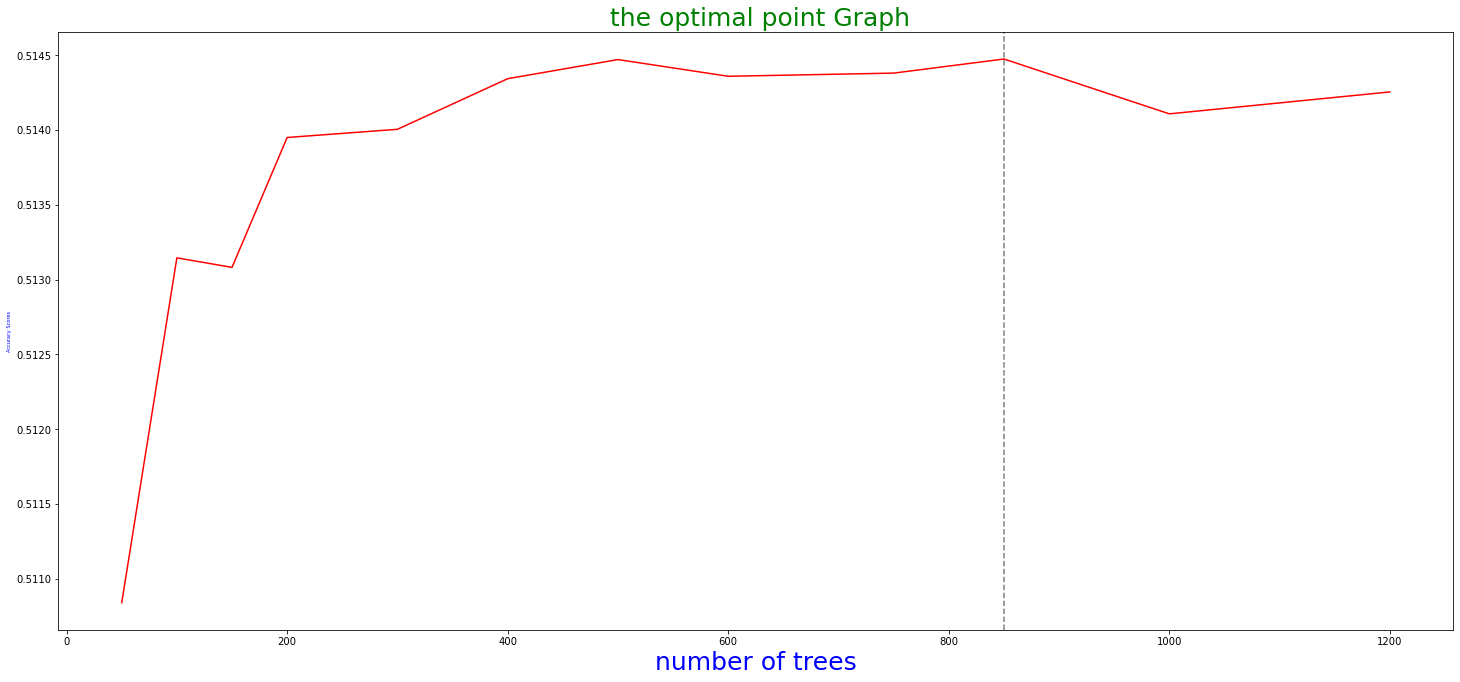

In [24]:
#displaying the results above

rcParams["figure.figsize"] = 25,11
plt.plot(trees_list, rf_accuracy_score_list,color="red")
plt.xlabel("number of trees", size = 25,color="blue")
plt.ylabel("Accuracy Scores", size = 5, color="blue")
plt.axvline(x = trees_list[np.argmax(rf_accuracy_score_list)],color='grey',linestyle='--')
# plt.axvline(x=titanic_optimal_number_of_trees['Optimal number of trees'].values,color='grey',linestyle='--')
plt.title(" the optimal point Graph", size = 25,color="green")
plt.show()

# 3.5 Undertake a ROC analysis and show how the RF performs relative to the previous models (logistic regression, classification tree and KNN). Provide evidence to show as clearly as possible which model is best for classifying survival on the Titanic.

Logistic Regression: ROC AUC=0.844 

Random Forest: ROC AUC=0.805 

Decision Tree Classifier: ROC AUC=0.781 

KNN Classifier: ROC AUC=0.788 



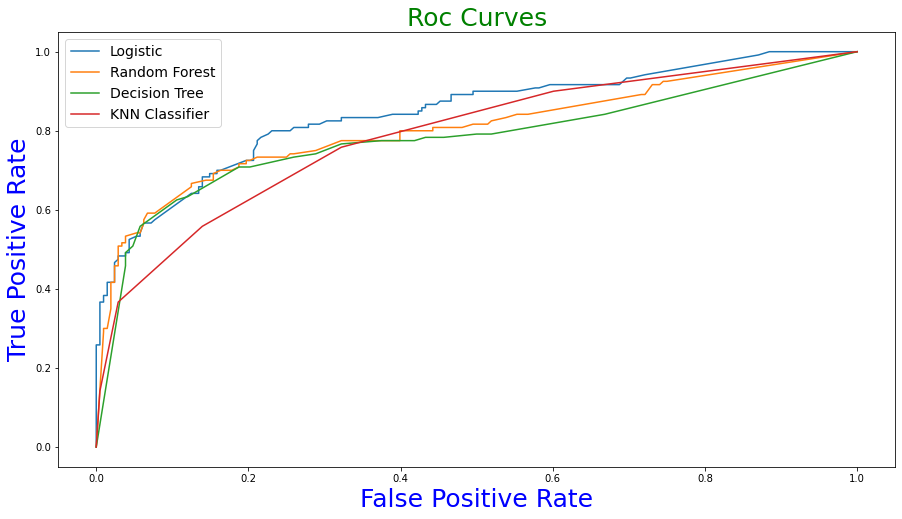

In [25]:

# roc curve and auc

# fit   logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

#fit random forest model
random_forest_classifier = RandomForestClassifier(n_estimators=20,random_state=0)
random_forest_classifier.fit(X_train,y_train)


#fit DecisionTree model
decision_tree_classifier = DecisionTreeClassifier(random_state=0,max_depth=None) 
decision_tree_classifier.fit(X_train,y_train)

#fit a KNN model
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)



# predict probabilities
logistic_regression_probabilities = logistic_regression.predict_proba(X_test)
random_forest_probabilities = random_forest_classifier.predict_proba(X_test)
decision_tree_probabilities = decision_tree_classifier.predict_proba(X_test)
knn_classifier_probabilities = knn_classifier.predict_proba(X_test)


# keep probabilities for the positive outcome only
logistic_regression_probabilities = logistic_regression_probabilities[:, 1]
random_forest_probabilities = random_forest_probabilities[:,1]
decision_tree_probabilities = decision_tree_probabilities[:,1]
knn_classifier_probabilities=knn_classifier_probabilities[:,1]



# calculate scores
logistic_regression_auc = roc_auc_score(y_test, logistic_regression_probabilities)
random_forest_auc = roc_auc_score(y_test,random_forest_probabilities)
decision_tree_auc = roc_auc_score(y_test,decision_tree_probabilities)
knn_classifier_auc=roc_auc_score(y_test,knn_classifier_probabilities)



# summarize scores
print('Logistic Regression: ROC AUC=%.3f' %(logistic_regression_auc),"\n")
print('Random Forest: ROC AUC=%.3f' % (random_forest_auc),"\n")
print('Decision Tree Classifier: ROC AUC=%.3f' % (decision_tree_auc),"\n")
print('KNN Classifier: ROC AUC=%.3f' % (knn_classifier_auc),"\n")

# calculate roc curves. for instance : fpr : false positive rate & tpr : true positive rate
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_test, logistic_regression_probabilities)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test,random_forest_probabilities)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probabilities)
knn_classifier_fpr, knn_classifier_tpr, _ = roc_curve(y_test,knn_classifier_probabilities )



# plot the roc curve for the model
plt.figure(figsize=(15,8))
plt.plot(logistic_regression_fpr, logistic_regression_tpr, label='Logistic')
plt.plot(random_forest_fpr,random_forest_tpr,label='Random Forest')
plt.plot(decision_tree_fpr,decision_tree_tpr,label='Decision Tree')
plt.plot(knn_classifier_fpr,knn_classifier_tpr,label='KNN Classifier')
# axis labels
plt.xlabel('False Positive Rate',color='blue',size=25)
plt.ylabel('True Positive Rate',color='blue',size=25)
#plotting graph title
plt.title('Roc Curves',color='green',size=25)
# show the legend
plt.legend(loc='best',fontsize=14)
# show the plot
plt.show()

conclusion

The Logistic regression model is the best model since it has the highest ROC AUC and it's has the highest value of True Positive rate.


The clear interpretation for this question can be found in the report

# 4. Ensembles for regression

# 4.1 Describe the concept of a random forest (RF) regression model.

The clear explanation for this question can be found in the report

# 4.2 Construct a random forest (RF) model for the red wine dataset and show how the optimal number of leafs was estimated.

In [26]:
#loading the dataset
red_wine_quality_address="winequality-red.csv"

red_wine_quality_data = pd.read_csv(red_wine_quality_address, delimiter=";")

#filtering dependent and independent variables in red wine dataset
X_red_wine=red_wine_quality_data.drop(columns=['quality'])
y_red_wine=red_wine_quality_data.filter(['quality'])

#check if the dataset contains null values
X_red_wine.isnull().sum()
y_red_wine.isnull().sum()

#splitting the red wine dataset into train and test data
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_wine, y_red_wine, test_size=0.25, random_state=0)


In [27]:
#accuracy scores list for leaves
red_wine_rf_accuracy_score_list=[]

#list of leaves in a forest 
red_wine_leaves_list=[50,100,150,200,300,400,500,600,750,850,1000,1200]

#loop over the leaves and calculate the accuracy, append the score to the list initialized 
for leaves in red_wine_leaves_list:
    red_wine_classifier = RandomForestRegressor( max_leaf_nodes=leaves,random_state=20)
    red_wine_classifier.fit(X_red_train,y_red_train)
    red_wine_random_forest_scores=red_wine_classifier.score(X_red_wine,y_red_wine)
    red_wine_rf_accuracy_score_list.append(red_wine_random_forest_scores)

#making a dataframe for the leaves accuracy calculated and display that dataframe
red_wine_leaves_df = pd.DataFrame(data = red_wine_rf_accuracy_score_list, columns = ['red wine Accuracy scores'])
red_wine_leaves_df[' red wine number of leaves']=red_wine_leaves_list
red_wine_leaves_df


,red wine Accuracy scores,red wine number of leaves
0,0.622311,50
1,0.719234,100
2,0.772345,150
3,0.804296,200
4,0.813434,300
5,0.813434,400
6,0.813434,500
7,0.813434,600
8,0.813434,750
9,0.813434,850


In [28]:
# Calculating the  optimal number of leaves in a forest 
red_wine_optimal_number_of_leaves =red_wine_leaves_df.sort_values(['red wine Accuracy scores'],ascending=False)
red_wine_optimal_number_of_leaves=red_wine_optimal_number_of_leaves.head(1)
red_wine_optimal_number_of_leaves=red_wine_optimal_number_of_leaves.rename(columns={"red wine number of leaves": "Optimal number of leaves"})
red_wine_optimal_number_of_leaves


,red wine Accuracy scores,red wine number of leaves
4,0.813434,300


# 4.3 Explain and show how the optimal number of trees was computed.

In [29]:
#accuracy scores list for trees
red_wine_rf_accuracy_score_list=[]
#list of trees in a forest 
red_wine_trees_list=[50,100,150,200,300,400,500,600,750,850,1000,1200]

#loop over the trees and calculate the accuracy, append the score to the list initialized 
for red_value in red_wine_trees_list:
    red_wine_classifier = RandomForestRegressor(n_estimators = red_value,random_state=20)
    red_wine_classifier.fit(X_red_train,y_red_train)
    red_wine_random_forest_scores=red_wine_classifier.score(X_red_wine,y_red_wine)
    red_wine_rf_accuracy_score_list.append(red_wine_random_forest_scores)
    
#making a dataframe for the leaves accuracy calculated and display that dataframe                 
red_wine_trees_df = pd.DataFrame(data = red_wine_rf_accuracy_score_list, columns = ['red wine Accuracy scores'])
red_wine_trees_df[' red wine number trees']=red_wine_trees_list
red_wine_trees_df


,red wine Accuracy scores,red wine number trees
0,0.813585,50
1,0.814728,100
2,0.815915,150
3,0.817676,200
4,0.818099,300
5,0.817876,400
6,0.817998,500
7,0.818624,600
8,0.818589,750
9,0.818700,850


In [30]:
# the optimal number of leaves in a forest 
red_wine_optimal_number_of_trees =red_wine_trees_df.sort_values(['red wine Accuracy scores'],ascending=False)
red_wine_optimal_number_of_trees


,red wine Accuracy scores,red wine number trees
9,0.818700,850
7,0.818624,600
8,0.818589,750
10,0.818374,1000
11,0.818134,1200
4,0.818099,300
6,0.817998,500
5,0.817876,400
3,0.817676,200
2,0.815915,150


In [31]:
red_wine_optimal_number_of_trees=red_wine_optimal_number_of_trees.head(1)
red_wine_optimal_number_of_trees=red_wine_optimal_number_of_trees.rename(columns={"red wine number of trees": "Optimal number of trees"})
red_wine_optimal_number_of_trees

,red wine Accuracy scores,red wine number trees
9,0.8187,850


# 4.4 Provide a bar graph showing the importance of each feature and compare this with the results from Assignment 6 (using correlation and LASSO).

In [32]:
red_wine_classifier = RandomForestRegressor(n_estimators = 850,random_state=20)
red_wine_classifier.fit(X_red_train,y_red_train) 
feature_imp=pd.Series(red_wine_classifier.feature_importances_,index=X_red_wine.columns).sort_values(ascending=False)
feature_imp

alcohol                 0.258521
volatile acidity        0.155993
sulphates               0.139103
total sulfur dioxide    0.078765
chlorides               0.065156
residual sugar          0.057743
pH                      0.056542
density                 0.050811
citric acid             0.047302
free sulfur dioxide     0.045356
fixed acidity           0.044707
dtype: float64

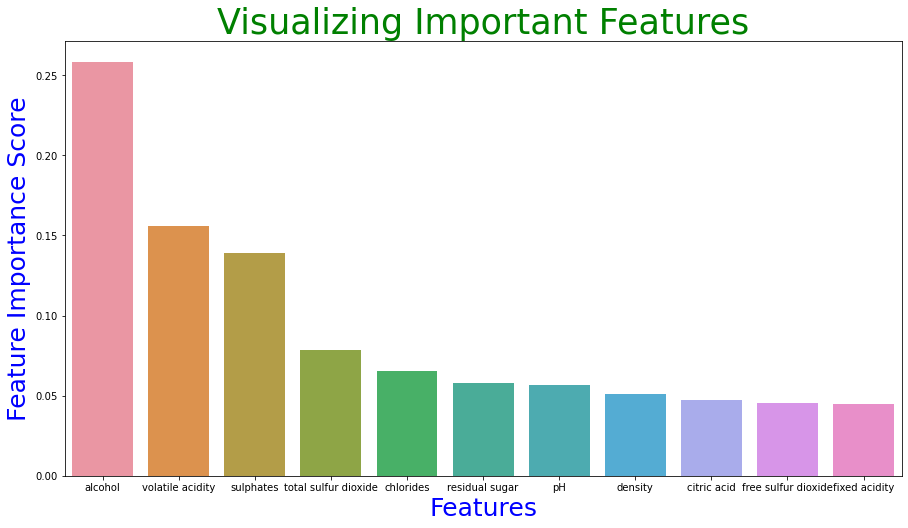

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(x=feature_imp.index,y=feature_imp)
plt.xlabel('Features',size=25,color='blue')
plt.ylabel('Feature Importance Score',size=25,color='blue')
plt.title('Visualizing Important Features',size=35,color='green')
plt.show()

The clear explanations for this question can be found in the report

# 4.5 What is the performance of the RF model and compare it with the linear regression and KNN models constructed during Assignment 6. Present sufficient information to support your conclusion about the best model for the red wine dataset.

In [34]:
# Create the model with optimal number of  trees
random_forest_classifier = RandomForestRegressor(n_estimators=850,random_state=20)

# Fit on training data
random_forest_classifier.fit(X_red_train, y_red_train)
random_forest_prediction=random_forest_classifier.predict(X_red_test)
random_forest_mse=mean_squared_error(y_red_test,random_forest_prediction)
random_forest_r2_score=r2_score(y_red_test,random_forest_prediction)

print(f"\nThe mean Squared Error for Random Forest model is : {random_forest_mse}\n")
print(f"The r2 score for Random Forest model is : {random_forest_r2_score}")


The mean Squared Error for Random Forest model is : 0.3421343252595156

The r2 score for Random Forest model is : 0.440219528979942


The clear explanations  for this question can be found in the report